### Author: Allan Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Data Science Student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@gmail.com
### Date Started: 2025-03-21 
### Last Updated: 20215-03-21 16:56

# 1.0 Introduction
For this project, we'll be placing ourselves in a role where We need to predict whether a customer will Beta Bank soon. The scenario is that customers are leaving little by little and chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones. We have the data on clients’ past behavior and termination of contracts with the bank.

We will build a model with an F1 score of at least 0.59, then check the F1 for the test set. Additionally, we'll measure the AUC-ROC metric and compare it with the F1. 

First we'll be importing the data and have a quick overview. Then clean the data as needed and follow up with EDA. Afterward we'll examine the balance of classes and train the model without taking into account the imbalance, then briefly describe our findings. Following that, we'll improve the quality of the model, ensuring we use at least two approaches to fixing class imbalance. We'll use the training set to pick the best parameters, then train different models on training and validation sets, find the best one, and briefly describe our findings. To finish, we'll perform the final testing.

### 1.1 Data Import & Overview
First let's import the necessary libraries and modules for this project, then import the data. To get an overview of what we're working with, let's look at the first five rows of the data, print the shape, and print the data types. 

In [242]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Churn.csv') 
display(df.head()) 
print(f'rows, columns:\n{df.shape}\n')
print(f'Data types:\n{df.dtypes}')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


rows, columns:
(10000, 14)

Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# 1.2 Data Description
Here is a description of all of the columns: 

Features:   
- RowNumber — data string index  
- CustomerId — unique customer identifier  
- Surname — surname  
- CreditScore — credit score  
- Geography — country of residence  
- Gender — gender  
- Age — age  
- Tenure — period of maturation for a customer’s fixed deposit (years)  
- Balance — account balance  
- NumOfProducts — number of banking products used by the customer  
- HasCrCard — customer has a credit card  
- IsActiveMember — customer’s activeness  
- EstimatedSalary — estimated salary

Target:  
- Exited — сustomer has left

# 2.0 Preprocessing & EDA
Now let's clean the data. Right off the bat I see that all of the column names are capitalized and multi-word column names are crushed together. Let's fix this so it adheres to the PEP8 Style Guide for Python Code. The next issue I see is the RowNumber column. Considering dataframes already have explicit indices, is this column really necessary?

### 2.1 Preprocessing

In [243]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'customerid': 'customer_id', 
                        'creditscore': 'credit_score', 
                        'numofproducts': 'num_of_products', 
                        'hascrcard': 'has_credit_card', 
                        'isactivemember': 'is_active_member', 
                        'estimatedsalary': 'estimated_salary'})
display(df.head())

,rownumber,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [244]:
df = df.drop('rownumber', axis= 1)

Let's check for NaNs and duplicates.

In [245]:
print(f'NaNs:\n{df.isna().sum()}\n')
print(f'NaNs percentage:\n{df.isna().sum()/df.shape[0]*100}\n')

NaNs:
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_credit_card       0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

NaNs percentage:
customer_id         0.00
surname             0.00
credit_score        0.00
geography           0.00
gender              0.00
age                 0.00
tenure              9.09
balance             0.00
num_of_products     0.00
has_credit_card     0.00
is_active_member    0.00
estimated_salary    0.00
exited              0.00
dtype: float64



There are 909 NaNs in df['tenure'], which is 9.09% of the column's data. Perhaps let's use interpolation to fix this.

In [246]:
#df.tenure = df.tenure.fillna(df.tenure.median())
df.tenure = df.tenure.interpolate(method='linear', limit_direction='both')
print(f'NaNs:\n{df.isna().sum()}\n')

NaNs:
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_credit_card     0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64



In [247]:
df.dtypes

customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_credit_card       int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [248]:
df.tenure = df.tenure.astype('int64')

Now that we've fixed that, let's check for duplicates.

In [249]:
df.duplicated().sum()

np.int64(0)

No duplicates, beautiful. We can now move on to the next step: EDA!

### 2.2 EDA Start


Since this project is centered on customers leaving, let's see how many have left. First let's look at our data again and then summate how many customers have left (df.exited == 1) and divide it by the total number of customers (df.shape), then multiply by 100 to obtain the percentage.

In [250]:
df.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [251]:
customer = df[df.exited == 0] 
former_customer = df[df.exited == 1]

print('Customers:')
display(customer.head())
print('Former Customers:')
display(former_customer.head())

Customers:


,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Former Customers:


,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [252]:
exited_customers = (df.exited == 1).sum()/df.shape[0]*100
print(f'Exited customers percentage: {exited_customers}%')

Exited customers percentage: 20.369999999999997%


Text(0, 0.5, 'Count')

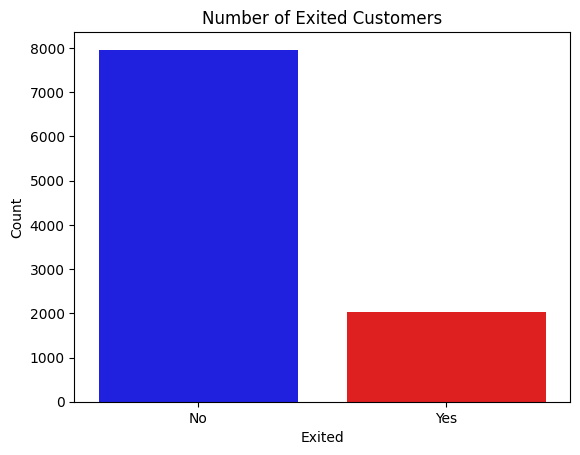

In [253]:
# Create the counts DataFrame
counts = df['exited'].value_counts().reset_index()
counts.columns = ['exited', 'count']
counts['exited'] = counts['exited'].replace({0: 'No', 1: 'Yes'})

# Plot the counts
sns.barplot(x= 'exited', 
            y= 'count', 
            data= counts, 
            palette= {'No': 'blue', 'Yes': 'red'}, 
            hue= 'exited')

plt.title('Number of Exited Customers') 
plt.xlabel('Exited')
plt.ylabel('Count')

### 2.3 Tenure

In [254]:
customer_tenure_describe = customer.tenure.describe()
former_customer_tenure_describe = former_customer.tenure.describe()

print(f'Customer tenure:\n{customer_tenure_describe}\n')
print(f'Former Customer tenure:\n{former_customer_tenure_describe}\n')

Customer tenure:
count    7963.000000
mean        4.998744
std         2.817081
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

Former Customer tenure:
count    2037.000000
mean        4.879234
std         2.878882
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64



20.37% of customers have left. 

Text(1.8209861111111127, 0.5, 'Count')

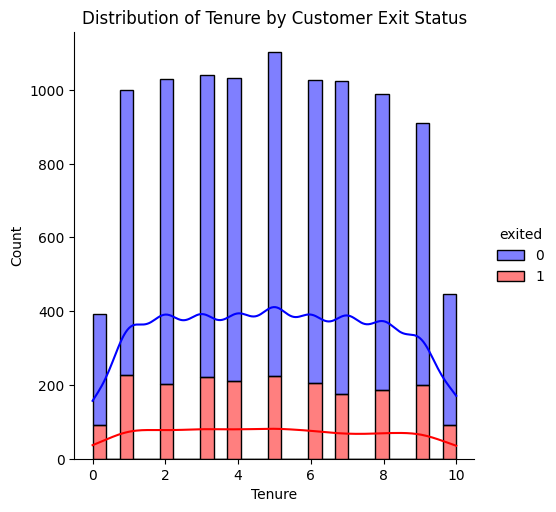

In [255]:
sns.displot(data=df, 
            x= 'tenure', 
            hue= 'exited', 
            palette= {0: 'blue', 1: 'red'}, 
            multiple= 'stack', 
            kde= True) 

plt.title('Distribution of Tenure by Customer Exit Status')
plt.xlabel('Tenure')
plt.ylabel('Count')

### 2.4 Age

It doesn't seem like tenure has an impact on whether a customer exits.

In [257]:
customer_age_describe = customer.age.describe()
former_customer_age_describe = former_customer.age.describe()

print("Description of Customers' Age:")
print(customer_age_describe)
print()
print("Description of Former Customers' Age:")
print(former_customer_age_describe)

Description of Customers' Age:
count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: age, dtype: float64

Description of Former Customers' Age:
count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: age, dtype: float64


In [279]:
df.exited.corr(df.age)

np.float64(0.2853230378350683)

Text(0.5, 0, 'Age')

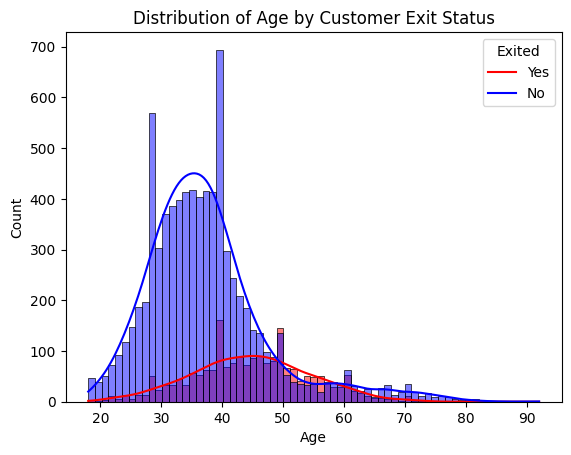

In [258]:
ax = sns.histplot(data= df, 
                  x= 'age', 
                  palette= {0: 'blue', 1: 'red'}, 
                  hue= 'exited', 
                  hue_order= [0, 1], 
                  kde= True)
legend = ax.legend(labels= ['Yes', 'No'])
legend.set_title('Exited')

plt.title('Distribution of Age by Customer Exit Status')
plt.xlabel('Age')

### 2.5 Gender

The age desciption and histogram seem to indicate that former customers tend to be older than those who are still customers.

In [259]:
customer_gender_count = customer.gender.value_counts()

print(f'Gender Count:\n{customer_gender_count} \n')
print(f'Gender Count (Percentage):\n{customer_gender_count/customer.shape[0]*100}')

Gender Count:
gender
Male      4559
Female    3404
Name: count, dtype: int64 

Gender Count (Percentage):
gender
Male      57.252292
Female    42.747708
Name: count, dtype: float64


In [260]:
former_customer_gender_count = former_customer.gender.value_counts()

print(f'Former Customer Gender Count:\n{former_customer_gender_count} \n')
print(f'Former Customer Gender Count (Percentage):\n{former_customer_gender_count/former_customer.shape[0]*100} \n')

Former Customer Gender Count:
gender
Female    1139
Male       898
Name: count, dtype: int64 

Former Customer Gender Count (Percentage):
gender
Female    55.915562
Male      44.084438
Name: count, dtype: float64 



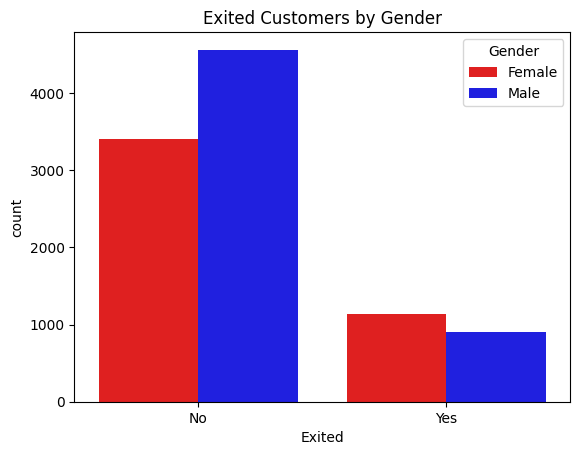

In [264]:
# Calculate counts for each combination of 'exited' and 'gender'
gender_counts = df.groupby(['exited', 'gender']).size().reset_index(name='count')

# Plot the counts
sns.barplot(data=gender_counts, 
            x='exited', 
            y='count',  
            hue='gender', 
            dodge=True, 
            palette={'Male': 'blue', 'Female': 'red'})

plt.title('Exited Customers by Gender')
plt.xlabel('Exited')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Gender')

While the barplot seems to indicate there are differences, the raw percentages between the two suggests that gender does not affect whether or not a customer leaves.  

Customers by gender:  
- Male: 57.25%  
- Female: 42.75%

Former Customers by gender:  
- Female: 55.92%  
- Male: 44.08%

In [265]:
df.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.6 Credit Score

In [276]:
customer_credit_score_describe = customer.credit_score.describe()
former_customer_credit_score_describe = former_customer.credit_score.describe()

print("Description of Customers' Credit Score:")
print(customer_credit_score_describe, "\n")
print("Description of Former Customers' Credit Score:")
print(former_customer_credit_score_describe)

Description of Customers' Credit Score:
count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: credit_score, dtype: float64 

Description of Former Customers' Credit Score:
count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: credit_score, dtype: float64


In [277]:
df.exited.corr(df.credit_score)

np.float64(-0.02709353975465779)

<Axes: xlabel='credit_score', ylabel='Count'>

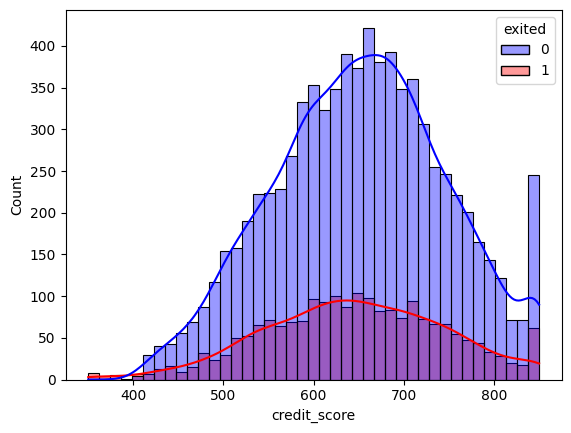

In [272]:
sns.histplot(data=df, 
             x= 'credit_score', 
             palette= {0: 'blue', 1: 'red'},
             hue= 'exited', 
             kde= True, 
             alpha= 0.4)

The description and graph do not seem to suggest a correlation between credit score and whether or not a customer stays. 

### 2.7 Geography

In [ ]:
france = former_customer.geography == 'France'
germany = former_customer.geography == 'Germany' 
spain = former_customer.geography == 'Spain'

In [290]:
france_exited_percentage = df[france & (df.exited == 1)].shape[0] / df[france].shape[0] * 100
germany_exited_percentage = df[germany & (df.exited == 1)].shape[0] / df[germany].shape[0] * 100
spain_exited_percentage = df[spain & (df.exited == 1)].shape[0] / df[spain].shape[0] * 100 

print(f'Percentage of customers who have exited in France: {france_exited_percentage:.2f}%') 
print(f'Percentage of customers who have exited in Germany: {germany_exited_percentage:.2f}%')
print(f'Percentage of customers who have exited in Spain: {spain_exited_percentage:.2f}%')


Percentage of customers who have exited in France: 16.15%
Percentage of customers who have exited in Germany: 32.44%
Percentage of customers who have exited in Spain: 16.67%


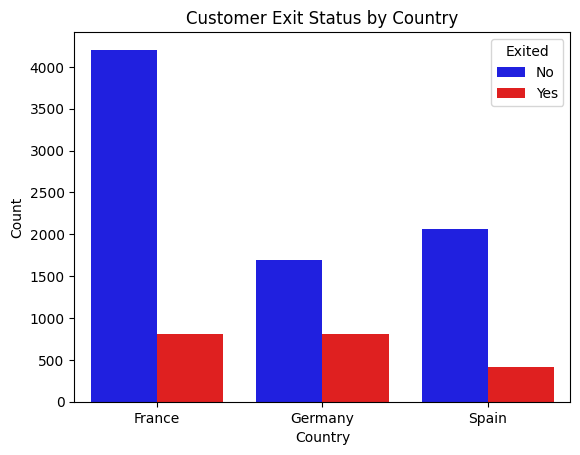

In [284]:
# Group the data by geography and exited, then count the occurrences
geo_counts = df.groupby(['geography', 'exited']).size().reset_index(name='count')
geo_counts['exited'] = geo_counts['exited'].replace({0: 'No', 1: 'Yes'})

# Plot the data
sns.barplot(data=geo_counts, 
            x='geography', 
            y='count', 
            hue='exited', 
            palette={'No': 'blue', 'Yes': 'red'})

plt.title('Customer Exit Status by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Exited')

In section 2.1 we established that an overall average of 20.37% of customers left Beta Bank. When we look at the averages by country, that changes. In France and Spain, 16.15% and 16.67% of customers left, but in Germany that figure is 32.44%. That's about twice as much as France and Spain, plus tnat's 1/3 of all German customers. Why is the exit rate so high in Germany?

### 2.8 EDA Conclusion 
Overall, the only factors that seems to indicate if a customer leaves are age and country. Country seems to have the strongest influence.